# Problema 2 - Enunciado

Utilizando las siguientes funciones/paquetes resolver los siguientes problemas de clasificación en **problema_2.py**:

**genfromtxt** de **numpy** para leer los dos datasets:
- ./datasets/student_admission.txt
- ./datasets/chip_tests.txt

**train_test_split** de **sklearn** para dividir entre test set y train set. Recomendamos un 40% de datos para test set

**GaussianNB** de **sklearn** como modelo de ML.

Y la función **plot_boundaries(X_train, X_test, y_train, y_test, score, predict_proba, ax=ax, h=h)** incluida en problema_2.py para graficar los resultados. X_train es un np.array con los features de entrada, y_train es la etiqueta. Lo mismo con X_test e y_test, Score es el 'accuracy' del modelo, predict_proba es la función que dada una entrada de la probabilidad de clasificar correcto y h es el paso para la grafica del 'boundary' 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_boundaries(X_train, X_test, y_train, y_test, score, probability_func, h = .02, ax = None):
    X = np.vstack((X_test, X_train))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    if ax is None:
        ax = plt.subplot(1, 1, 1)
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    
    Z = probability_func(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    cf = ax.contourf(xx, yy, Z, 50, cmap=cm, alpha=.8)
    plt.colorbar(cf, ax=ax)
    #plt.colorbar(Z,ax=ax)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k', s=100)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6, s=200)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=40, horizontalalignment='right')

    
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

''' 
Utilizando las siguientes funciones/paquetes resolver los siguientes problemas de clasificación en **problema_2.py**:

**genfromtxt** de **numpy** para leer los dos datasets:
- ./datasets/student_admission.txt
- ./datasets/chip_tests.txt

**train_test_split** de **sklearn** para dividir entre test set y train set. Recomendamos un 40% de datos para test set

**GaussianNB** de **sklearn** como modelo de ML.

Y la función **plot_boundaries(X_train, X_test, y_train, y_test, score, predict_proba, ax=ax, h=h)** incluida en problema_2.py para graficar los resultados. X_train es un np.array con los features de entrada, y_train es la etiqueta. Lo mismo con X_test e y_test, Score es el 'accuracy' del modelo, predict_proba es la función que dada una entrada de la probabilidad de clasificar correcto y h es el paso para la grafica del 'boundary' 
'''

def train_and_plot(X, y, h=1):
    # TODO
    return

# Resolución

In [14]:
# Primer parte - Importo mediante genfromtxt los 2 datasets.

#Students
dataset_students =np.genfromtxt("./datasets/student_admission.txt", delimiter=",")
s_features = dataset_students[:,0:2]
s_labels = dataset_students[:,2]

#Chips
dataset_chips = np.genfromtxt("./datasets/chip_tests.txt", delimiter = "," , dtype = None)
c_features = dataset_students[:,0:2]
c_labels = dataset_students[:,2]

In [15]:
# Segunda parte - Mediante el uso de Train_test_split(sklearn) divido el dataset en "test set" y "train set"

# 1)Aplico al dataset de Students
# test_size = .4 es 40 % para test, 60 % para train, luego.
sx_train, sx_test, sy_train, sy_test = train_test_split(s_features, s_labels, test_size =.4, random_state = 0) 

np.shape(s_features)
np.shape(sx_train)

(60, 2)

In [16]:
# Segunda parte - Mediante el uso de Train_test_split(sklearn) divido el dataset en "test set" y "train set"

# 2)Aplico al dataset de Chips
# test_size = .4 es 40 % para test, 60 % para train, luego.
cx_train, cx_test, cy_train, cy_test = train_test_split(c_features, c_labels, test_size =.4, random_state = 0) 

np.shape(c_features)
np.shape(cx_train)

(60, 2)

Score:  0.8833333333333333
Test-Score:  0.9


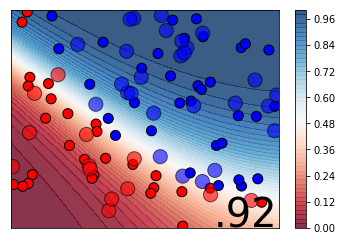

In [17]:
#Tercer parte - GaussianNB de sklearn como modelo de ML y grafico resultados.
gnb = GaussianNB()

# 1)Aplico al dataset de Students
sy_prediction = gnb.fit(sx_train, sy_train)
print("Score: ",sy_prediction.score(sx_train, sy_train))

sy_prediction_test = gnb.fit(sx_test, sy_test)
print("Test-Score: ",sy_prediction_test.score(sx_test, sy_test))

plot_boundaries(sx_train, sx_test, sy_train, sy_test, sy_prediction.score(sx_train, sy_train), gnb.predict_proba)

Score:  0.925
Test-Score:  0.9


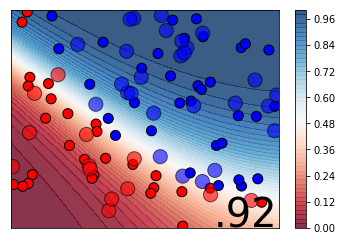

In [18]:
# 2)Aplico al dataset de Chips
cy_prediction = gnb.fit(cx_train, cy_train)
print("Score: ",cy_prediction.score(cx_test, cy_test))

cy_prediction_test = gnb.fit(cx_test, cy_test)
print("Test-Score: ",cy_prediction_test.score(cx_test, cy_test))

plot_boundaries(cx_train, cx_test, cy_train, cy_test, cy_prediction.score(cx_train, cy_train), gnb.predict_proba)